<a href="https://colab.research.google.com/github/Solojang/COMPUTER-PROG-FOR-GIS/blob/main/tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*** Tutorial of process Raster with python***

**This is a basic tutorial about how to process Raster fiel(tiff).**
**in this tutorial, I will demostrate how to plot grah and chart by using Python code.**

Before we get start, remenber to download the hard data in this repo [data](https://github.com/Solojang/COMPUTER-PROG-FOR-GIS/tree/main/data).
The raw data was download from [mapbiosmas](https://mapbiomas.org/download).
the size of the raw data is **1000 pixels *1000 pixels with 30 meters resolution,with 10 time points ranging from 1986 to 2004, with a time interval of 2 years between time points**.
The location of this data is **Northeast of the Brazillian state of Mato Grosso**.
The categories of this data is: **Forest, Non Forest Natural  Formation, Farming, Non Vegetated Area, Water**


**Notice the study area is not a big area, because we do not want make runtime problems.**

in this repo [data](https://github.com/Solojang/COMPUTER-PROG-FOR-GIS/tree/main/data). I did some preprocessing for the raw data. 
**If you want to download data yourself, remember to preprocess the data.**

**don't forget to open the prepossed data on your ARCGIS to see how it looks like.**


**First, import data**
Try these code on colab

In [47]:
from osgeo import gdal
from google.colab import files
uploaded = files.upload()

Saving categorydata.tif to categorydata (5).tif


It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

Next step let's try to check if the file upload successfully.

In [49]:
from io import BytesIO
#uploaded=files.upload()
data1=gdal.Open("categorydata.tif")
data1

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fbd3e5013c0> >

Next, let's create a overview map of our data, try these code on colab.

Remember, In these chunk, we create labels and change the palette and the format of the raw data, If we don't do that, the maps we made will looks like the raw data.

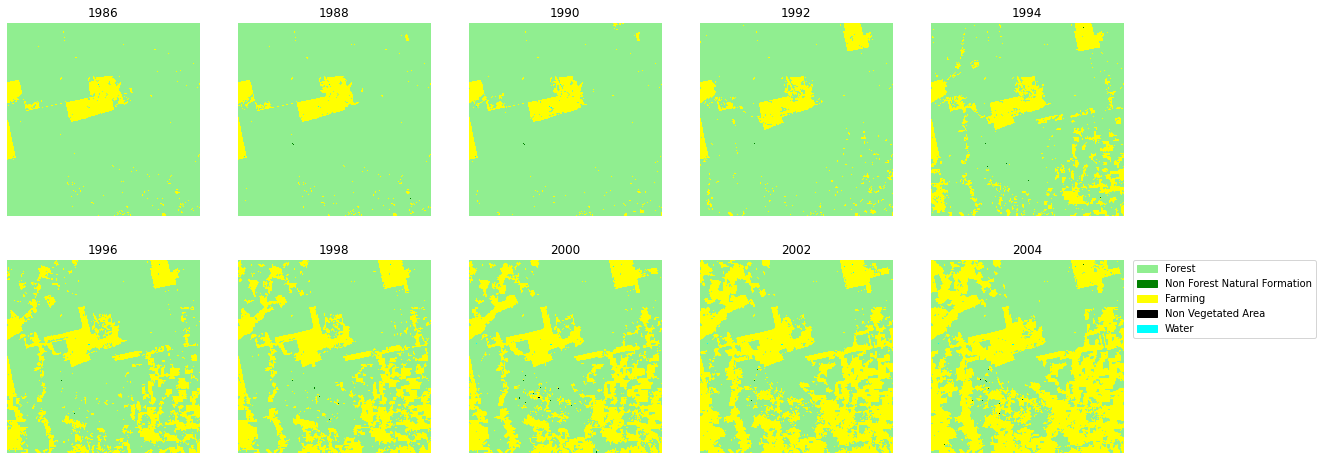

In [56]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
#Those are the libaries we need

categorylist=['Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']

colorlist=['lightgreen','green','yellow','black','aqua']
cmap = colors.ListedColormap(['lightgreen','green','yellow','black','aqua'])
boundaries = [0, 1, 2, 3, 4, 5, 6]
norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)


i=1
values = np.unique(cdata[i].ravel())

fig, ax = plt.subplots(2,5,figsize=(20,8))

yearlist=np.arange(1986,2006,2).astype(str)

for ii in range(nb):
    im = ax.ravel()[ii].imshow(cdata[ii], interpolation='none',cmap=cmap,norm=norm)
    ax.ravel()[ii].axis('off')
    ax.ravel()[ii].set_title(yearlist[ii])
    # get the colors of the values, according to the 
    # colormap used by imshow
    #colors = [ im.cmap(im.norm(value)) for value in values]
    # create a patch (proxy artist) for every color 
    if(ii==nb-1):
        patches = [mpatches.Patch(color=colorlist[i-1], label=categorylist[i-1]) for i in np.unique(cdata[cdata!=0])]
        # put those patched as legend-handles into the legend
        ax.ravel()[ii].legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

In this chunk, we will create 3 maps referenced by:

**Pontius, R. G., Krithivasan, R., Sauls, L., Yan, Y., & Zhang, Y. (2017). Methods to summarize change among land categories across time intervals. Journal of Land Use Science, 12(4), 218–230. https://doi.org/10.1080/1747423X.2017.1338768**

we call these map:

1st: Incidents. This is a TIF file with values from 0 to 8

2nd: States. TIF with values from 1 to 4

3rd: Combinations. this is the combination of incidents and states, it is a TIF with values from 1 to 4



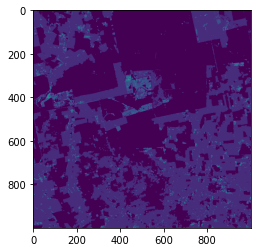

In [60]:
import os
import gdal
import numpy as np
import pandas
import matplotlib.pyplot as plt

nb=data1.RasterCount
ns=int(data1.RasterXSize)
nl=int(data1.RasterYSize)

dataar=data1.ReadAsArray().astype('byte')
cdata=dataar

#Categorical data
newarr = np.diff(cdata, axis=0)
incidents=np.count_nonzero(newarr,axis=0)

#writedata(FileName,incidents)
#plt.imshow(incidents,cmap='plasma')

countpixel=[]
#count pixels with number of changes
for y in range(nb):
    for i in np.unique(incidents):
        #countpixel.append(np.sum(binarydata[y]==i))
        countpixel.append(np.sum(cdata[y]==i))
        
changemap=newarr!= 0
changemap=changemap.astype(int)        
        

def convert(list): 
      
    # Converting integer list to string list 
    s = [str(i) for i in list] 
      
    # Join list items using join() 
    res = str("".join(s)) 
      
    return(res) 

unique_=np.zeros((nl,ns)).astype(str)
# Driver code for
for i in range(nl):
    for j in range(ns):
        #a = binarydata[:,i,j].tolist()
        a = changemap[:,i,j].tolist()
        unique_[i,j]=convert(a)
            

np.size(np.unique(unique_))
np.unique(unique_).astype(str)

startyear='1986'
endyear='2004'
gap=2

#plot incidents
plt.imshow(incidents)

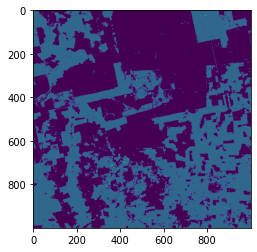

In [58]:
map_=np.zeros((nl,ns)).astype('byte')
map_[incidents==0]=0
map_[incidents==1]=1

states=np.zeros((nl,ns))
## count unique elements
for i in range(nl):
    for j in range(ns):
        states[i][j]=len(np.unique(cdata[:,i,j]))
        
map_[np.logical_and(incidents>=2,states==2)]=2
map_[np.logical_and(incidents>=2,states>2)]=3

#plot states
plt.imshow(states)

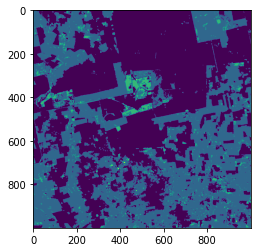

In [59]:
#plot combination
plt.imshow(map_)

In this chunk, we will create a grah to show the propotation of pixels that transition to other category year by year, and how the total land cover changed on study area.

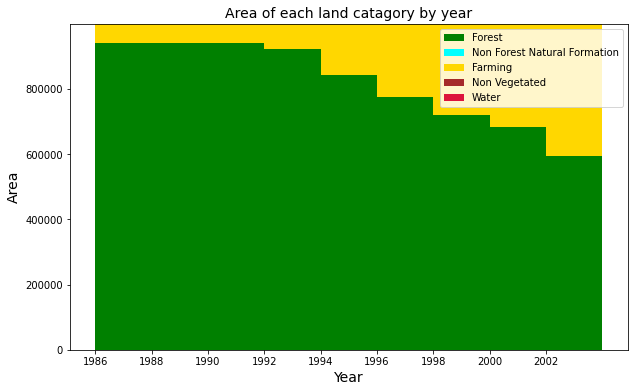

In [38]:
### AREA ####

#for each time interval
#for each categroy
import pandas as pd

dfpres=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfpres['year']=np.arange(int(startyear),int(endyear),gap)



for c in np.unique(cdata[cdata!=0]):
    pres=[]

    for t in range(nb-1):
        pres.append(np.sum(cdata[t]==c))
    
    dfpres.iloc[:,c]=pres
        


### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfpres['year'].astype('str')

width=1.0
bargheight=dfpres.iloc[:,1:].cumsum(axis=1)


p=[]
p.append(ax.bar(xlabels,dfpres.iloc[:,1],width,color='green',align='edge'))


colors=['aqua','gold','brown','crimson']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfpres.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_title('Area of each land catagory by year',fontsize=14)
ax.set_ylabel('Area',fontsize=14)
ax.set_xlabel('Year',fontsize=14)
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated','Water',))    

ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()

In this chunk, we will create a grah to show the numbers of pixels that transition to other category.

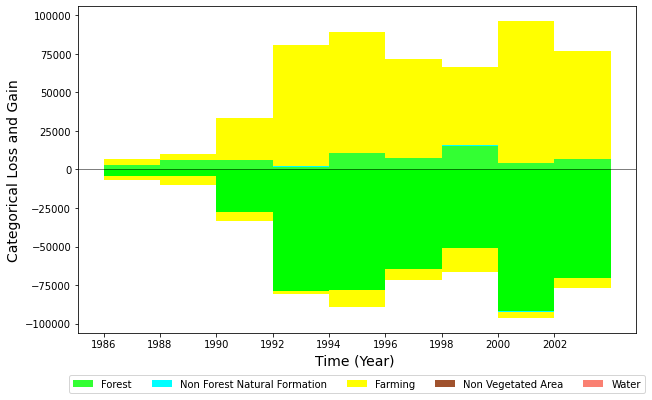

In [57]:
### LOSS AND GAIN ####

#for each time interval
#for each categroy
import pandas as pd
dfloss=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
#gainloss.columns=['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water']
dfloss['year']=np.arange(int(startyear),int(endyear),gap)

dfgain=pd.DataFrame(columns = ['year','Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'])
dfgain['year']=np.arange(int(startyear),int(endyear),gap)

for c in np.unique(cdata[cdata!=0]):
    loss=[]
    gain=[]
    for t in range(nb-1):
        #loss for category c
        loss.append(np.sum(np.logical_and(cdata[t]==c,cdata[t+1]!=c)))
        lossind=np.where(np.logical_and(cdata[t]==c,cdata[t+1]!=c))

        gain.append(np.sum(np.logical_and(cdata[t]!=c,cdata[t+1]==c)))
        gainind=np.where(np.logical_and(cdata[t]!=c,cdata[t+1]==c))

    dfloss.iloc[:,c]=loss
    dfgain.iloc[:,c]=gain

    
### PLOT LOSS AND GAIN ####
fig, ax = plt.subplots(figsize=(10,6))

#labels=np.flip(change[count.argsort()])[0:10]
xlabels=dfgain['year'].astype('str')

width=1.0
bargheight=dfgain.iloc[:,1:].cumsum(axis=1)
barlheight=dfloss.iloc[:,1:].cumsum(axis=1)

p=[]
p.append(ax.bar(xlabels,dfgain.iloc[:,1],width,color='lime',alpha=0.8,align='edge'))

x=[]
x.append(ax.bar(xlabels,-dfloss.iloc[:,1],width,color='lime',align='edge'))


colors=['cyan','yellow','sienna','salmon']
for i in np.unique(cdata[cdata!=0])[1:]:
    p.append(ax.bar(xlabels,dfgain.iloc[:,i],width,bottom=bargheight.iloc[:,i-2],color=colors[i-2],align='edge'))
    x.append(ax.bar(xlabels,-dfloss.iloc[:,i],width,bottom=-barlheight.iloc[:,i-2],color=colors[i-2],align='edge'))

ax.set_ylabel('Categorical Loss and Gain',fontsize=14)
ax.set_xlabel('Time (Year) ',fontsize=14)
plt.legend((p[0][0], p[1][0],p[2][0],p[3][0],p[4][0]), ('Forest','Non Forest Natural Formation','Farming','Non Vegetated Area','Water'),ncol=5, bbox_to_anchor=(0.5, -0.20),loc='lower center')    

ax.axhline(y=0,color='0',linewidth=0.5)
plt.show()

#IF you want to store the grap locally, try these code

# fig.savefig('D:\\"your address"\\loss_and_gain.jpg', dpi=300,format='jpg')